 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [99]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [100]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
# whale_returns.describe()
whale_returns.sort_index(ascending = True, inplace = True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [101]:
# Count nulls
print(whale_returns.isnull().sum())
print(whale_returns[whale_returns.isnull().any(axis = 1)])

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  


In [102]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [103]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_returns.sort_index(ascending = True, inplace = True)
algo_returns.head(100)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2014-10-10,-0.012612,-0.011752
2014-10-13,-0.018528,-0.002009
2014-10-14,0.000702,0.004501


In [104]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [105]:
# Drop nulls
algo_returns.dropna(inplace = True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [106]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_index(ascending = True, inplace = True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [107]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [108]:
# Fix Data Types
sp500_history["Close"]= sp500_history["Close"].str.replace('$','').astype("float")
sp500_history.sort_index(inplace = True)
sp500_history

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
...,...
2019-04-16,2907.06
2019-04-17,2900.45
2019-04-18,2905.03


In [109]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history.pct_change()

In [110]:
# Drop nulls
sp500_daily_returns.dropna(inplace = True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [111]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.rename(columns = {"Close":"sp500"}, inplace = True)
sp500_daily_returns

,sp500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [112]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns, algo_returns,sp500_daily_returns], axis = "columns",join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

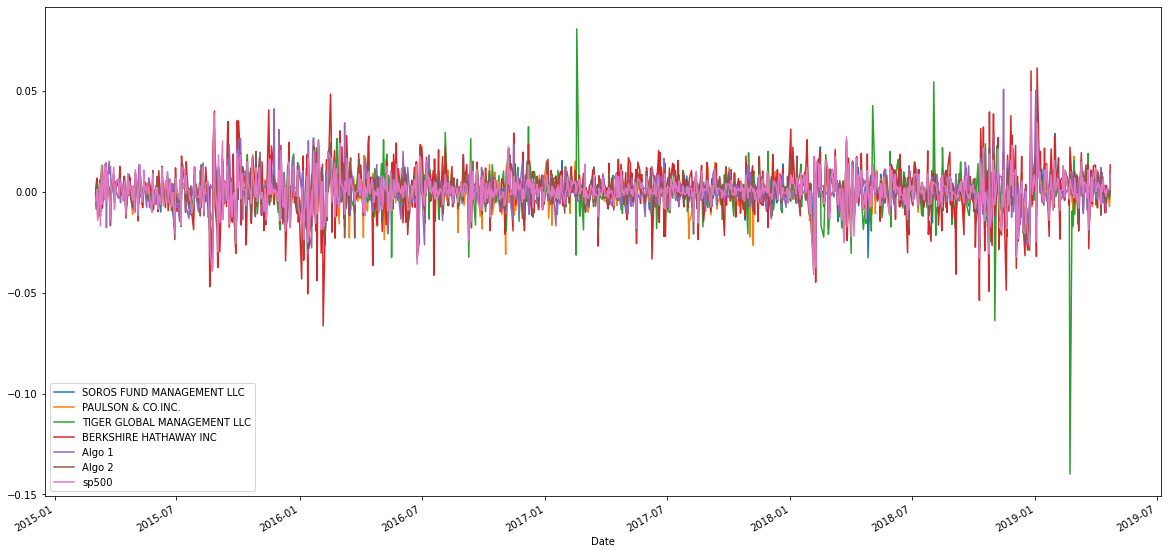

In [113]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

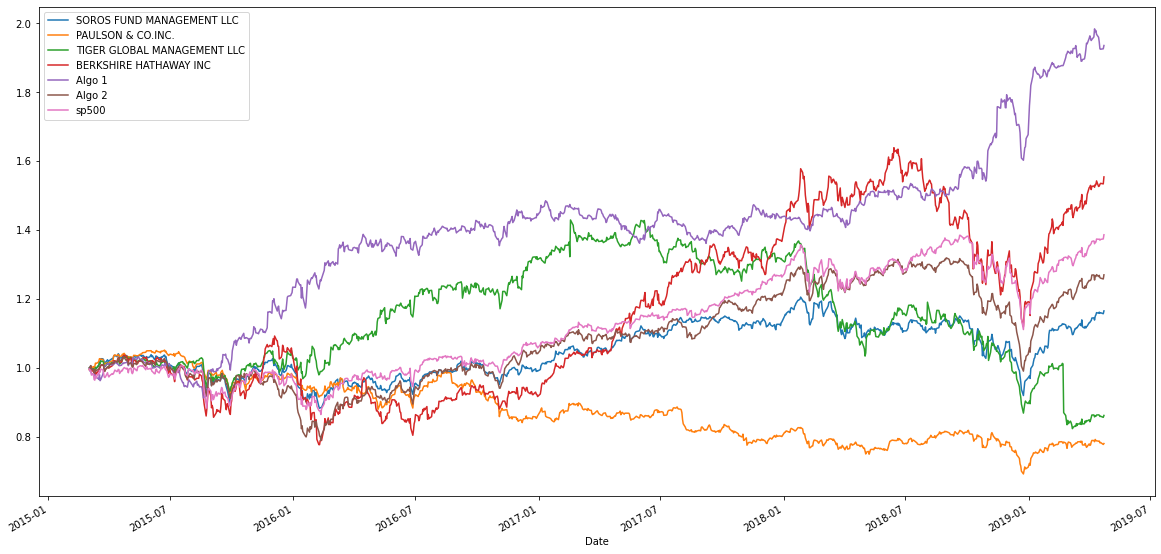

In [114]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1+ combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

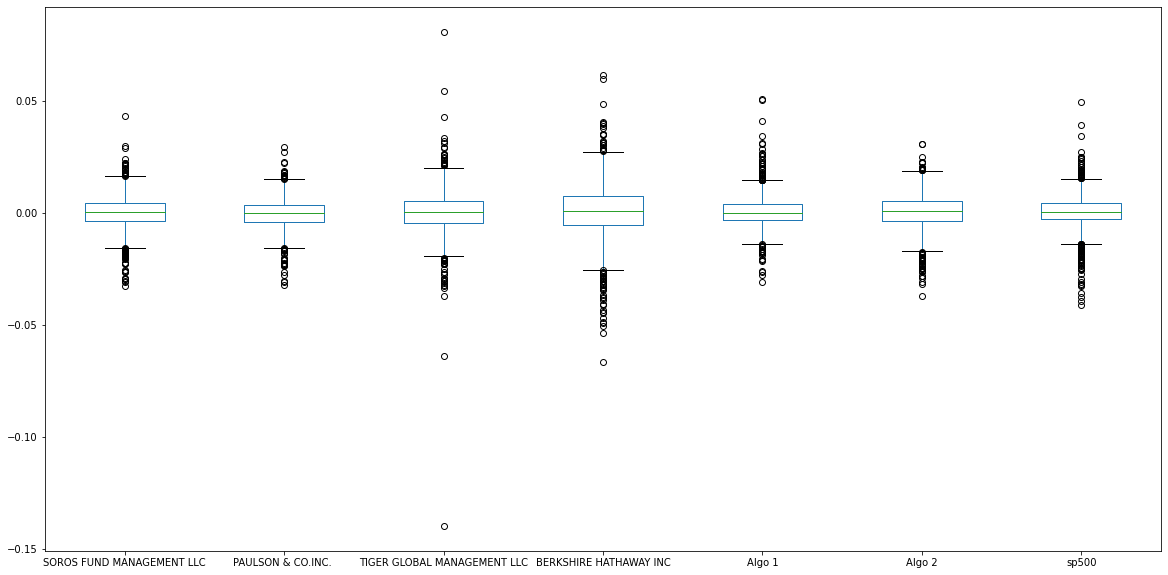

In [115]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))

### Calculate Standard Deviations

In [116]:
# Calculate the daily standard deviations of all portfolios
daily_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"Standard Deviation"})
daily_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
sp500,0.008554


### Determine which portfolios are riskier than the S&P 500

In [117]:
# Calculate  the daily standard deviation of S&P 500
sp500_daily_std = sp500_daily_returns.std()
sp500_daily_std
# Determine which portfolios are riskier than the S&P 500
higher_std = daily_std[daily_std["Standard Deviation"] > daily_std.loc["sp500", "Standard Deviation"]]
higher_std

,Standard Deviation
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


### Calculate the Annualized Standard Deviation

In [118]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

,Standard Deviation
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
sp500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviations'}, xlabel='Date'>

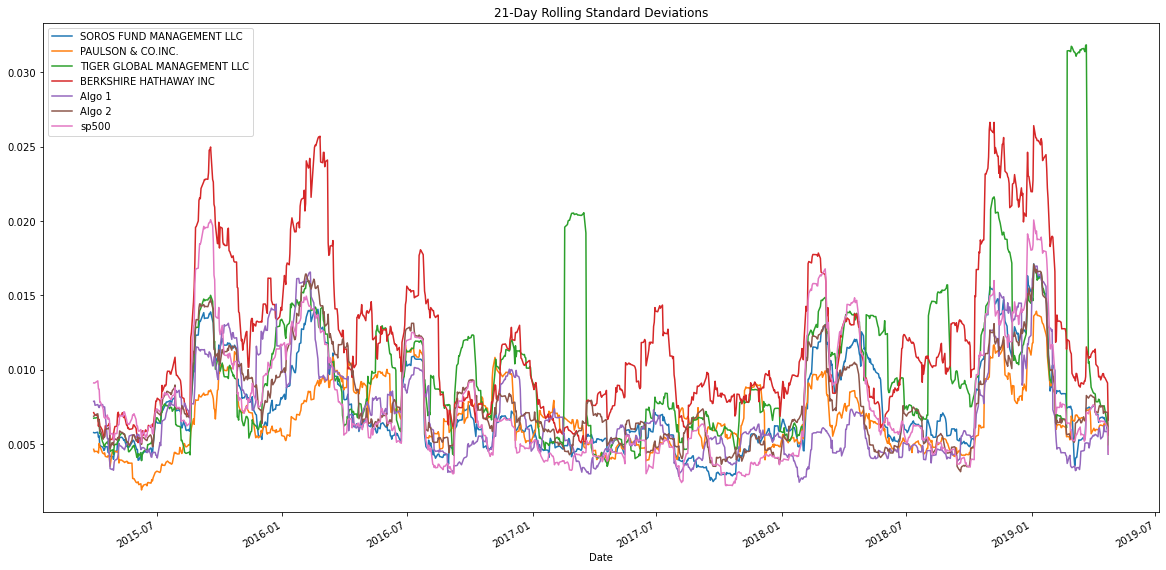

In [119]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
sp500_rolling_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")

### Calculate and plot the correlation

<AxesSubplot:>

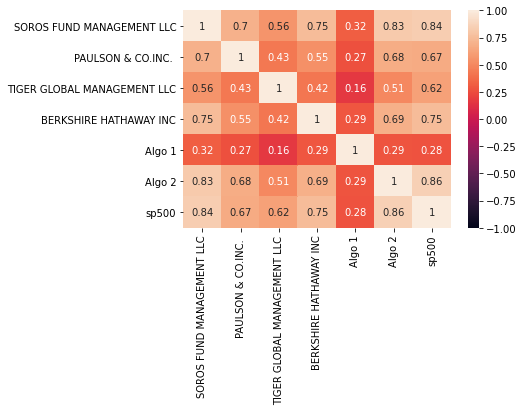

In [120]:
# Calculate the correlation
correlation = combined_df.corr()
correlation
# Display de correlation matrix
sns.heatmap(correlation,  vmin=-1, vmax=1,annot=True)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Berkshire Hathaway'}, xlabel='Date'>

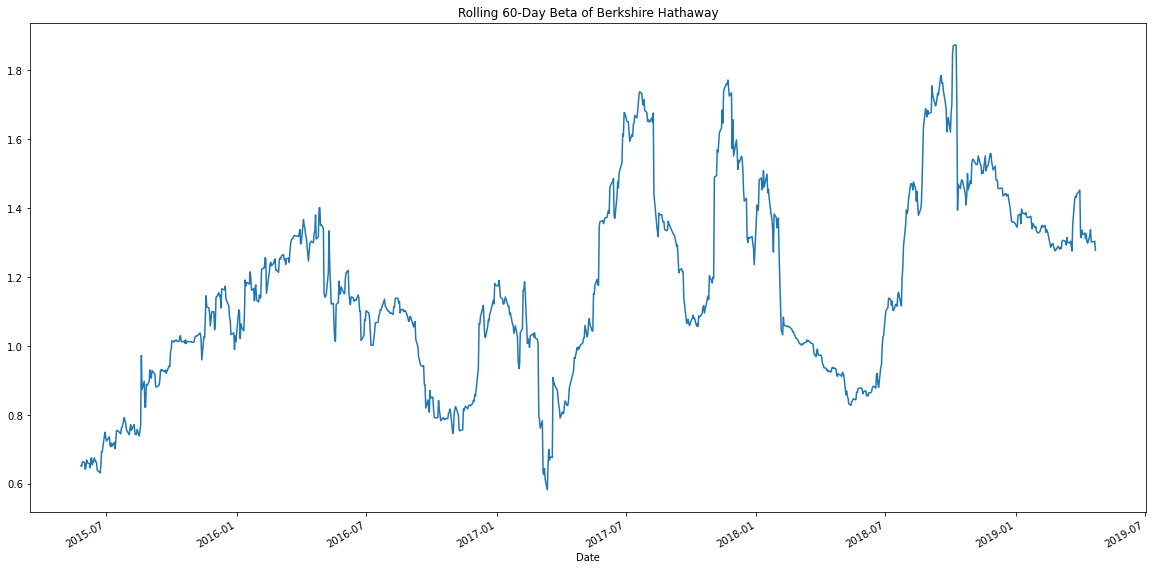

In [121]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['sp500'])
# Calculate variance of S&P 500
rolling_variance = combined_df['sp500'].rolling(window=60).var()
# Computing beta
rolling_beta = rolling_covariance / rolling_variance
# Plot beta trend
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Berkshire Hathaway')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

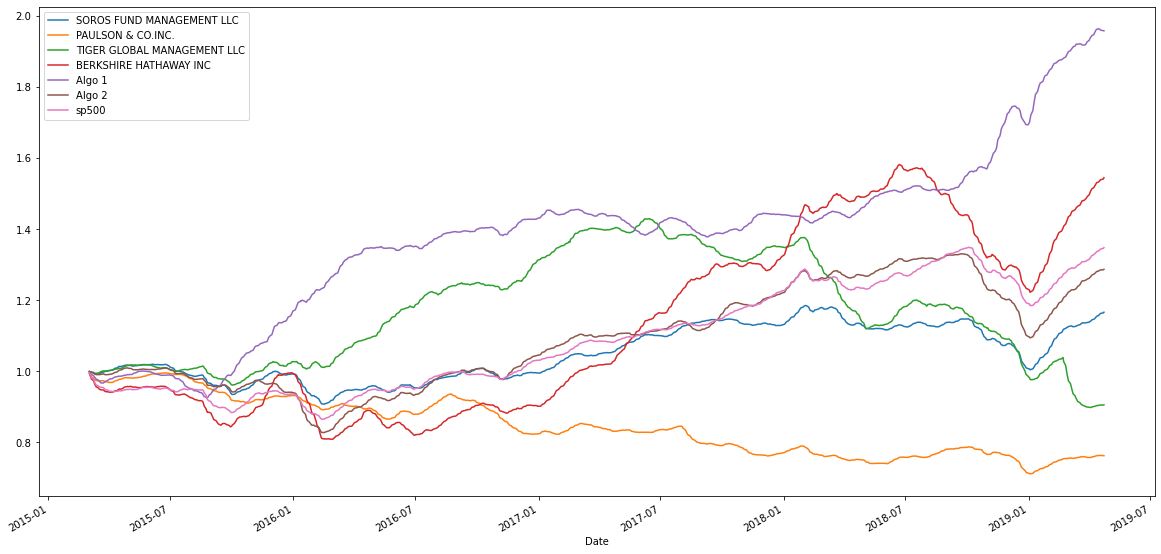

In [122]:
# Use `ewm` to calculate the rolling window
exponentially_weighted_average = combined_df.ewm(span = 21,adjust = False).mean()
(1+exponentially_weighted_average).cumprod().plot(figsize = (20,10))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [123]:
# Annualized Sharpe Ratios
annualized_sharpe_ratios = combined_df.mean()*252/(combined_df.std()*np.sqrt(252))
annualized_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
sp500                          0.648267
dtype: float64

<AxesSubplot:title={'center':'Annualized Sharpe Ratios'}>

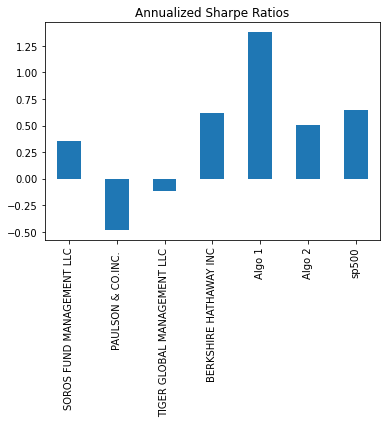

In [124]:
# Visualize the sharpe ratios as a bar plot
annualized_sharpe_ratios.plot(kind = "bar", title = "Annualized Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---On the basis of Annualized Sharpe Ratios, Algo 1 outperformed both the market as a whole as well as the Investment Mangement Firm portfolios. Algo 2, however, underperformed the market as a whole, as well as Berkshire Hathaway. Both Algo 1 and Algo 2 outperformed Soros Fund Managment, Paulson & Co. and Tiger Global Management.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [125]:
# Reading data from 1st stock
google_returns_csv = Path("goog_historical.csv")
google_df = pd.read_csv(google_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

#Reorganizing portfolio data by having a column per symbol
google_df = google_df.drop('Symbol', axis=1)
google_df.columns = ["GOOG Close"]
google_df.head()

,GOOG Close
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [126]:
# Reading data from 2nd stock
apple_returns_csv = Path("aapl_historical.csv")
apple_df = pd.read_csv(apple_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

#Reorganizing portfolio data by having a column per symbol
apple_df = apple_df.drop('Symbol', axis=1)
apple_df.columns = ["AAPL Close"]
apple_df.head()

,AAPL Close
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [127]:
# Reading data from 3rd stock
costco_returns_csv = Path("cost_historical.csv")
costco_df = pd.read_csv(costco_returns_csv, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

#Reorganizing portfolio data by having a column per symbol
costco_df = costco_df.drop('Symbol', axis=1)
costco_df.columns = ["COST Close"]
costco_df.head()

,COST Close
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [128]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([google_df, apple_df, costco_df], axis='columns', join='inner')
my_portfolio_df.head()

,GOOG Close,AAPL Close,COST Close
Trade DATE,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62


In [129]:
# Reset Date index
my_portfolio_df.reset_index()

,Trade DATE,GOOG Close,AAPL Close,COST Close
0,2019-05-09,1162.38,200.72,243.47
1,2019-05-08,1166.27,202.90,241.34
2,2019-05-07,1174.10,202.86,240.18
3,2019-05-06,1189.39,208.48,244.23
4,2019-05-03,1185.40,211.75,244.62
...,...,...,...,...
245,2018-05-17,1078.59,186.99,199.60
246,2018-05-16,1081.77,188.18,198.71
247,2018-05-15,1079.23,186.44,195.48
248,2018-05-14,1100.20,188.15,195.88


In [130]:
# Reorganize portfolio data by having a column per symbol

#Completed through earlier steps while reading in the data#

In [131]:
# Calculate daily returns
daily_returns = my_portfolio_df.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)
# Display sample data
daily_returns.head()

,GOOG Close,AAPL Close,COST Close
Trade DATE,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [132]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
combined_returns = my_portfolio_df.dot(weights)
# Display sample data
combined_returns.head()
custom_portfolio_returns = daily_returns.dot(weights)
custom_portfolio_returns.head()

Trade DATE
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [133]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolio_returns = pd.concat([my_portfolio_df,combined_returns], axis="columns", join="inner")
x = all_portfolio_returns.columns[-1]
all_portfolio_returns = all_portfolio_returns.rename(columns={x:"My Portfolio"})
all_portfolio_returns.head()

,GOOG Close,AAPL Close,COST Close,My Portfolio
Trade DATE,,,,
2019-05-09,1162.38,200.72,243.47,535.523333
2019-05-08,1166.27,202.90,241.34,536.836667
2019-05-07,1174.10,202.86,240.18,539.046667
2019-05-06,1189.39,208.48,244.23,547.366667
2019-05-03,1185.40,211.75,244.62,547.256667


In [134]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_returns.head()
all_portfolio_returns.dropna(axis=0, how="any", inplace=True)
all_portfolio_returns

,GOOG Close,AAPL Close,COST Close,My Portfolio
Trade DATE,,,,
2019-05-09,1162.38,200.72,243.47,535.523333
2019-05-08,1166.27,202.90,241.34,536.836667
2019-05-07,1174.10,202.86,240.18,539.046667
2019-05-06,1189.39,208.48,244.23,547.366667
2019-05-03,1185.40,211.75,244.62,547.256667
...,...,...,...,...
2018-05-17,1078.59,186.99,199.60,488.393333
2018-05-16,1081.77,188.18,198.71,489.553333
2018-05-15,1079.23,186.44,195.48,487.050000


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [135]:
# Calculate the annualized `std`
all_annualized_std = all_portfolio_returns.std() * np.sqrt(252)
all_annualized_std

GOOG Close      1077.034185
AAPL Close       340.293451
COST Close       229.138982
My Portfolio     480.246845
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviations'}, xlabel='Trade DATE'>

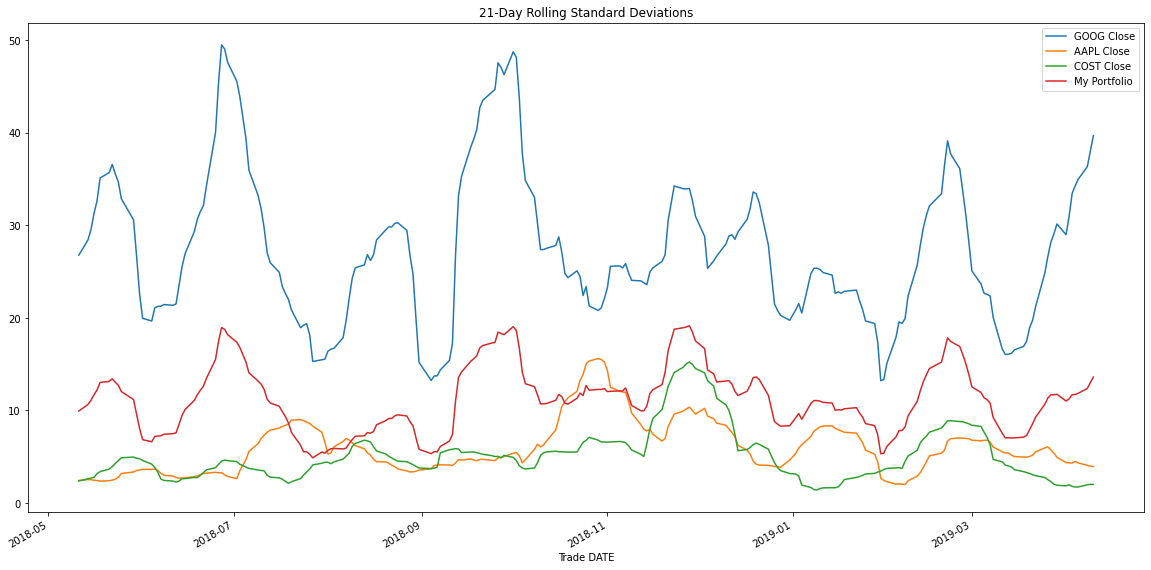

In [136]:
# Calculate rolling standard deviation
all_portfolio_returns_std = all_portfolio_returns.rolling(window=21).std()
# Plot rolling standard deviation
all_portfolio_returns_std.plot(figsize = (20,10), title="21-Day Rolling Standard Deviations")

### Calculate and plot the correlation

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviations'}>

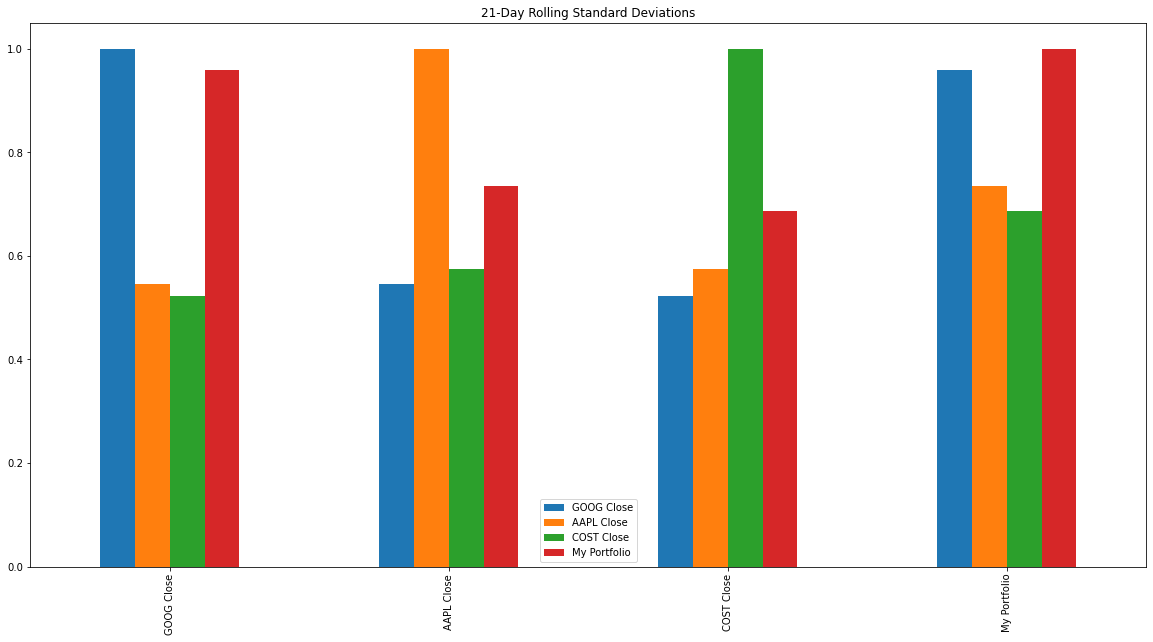

In [137]:
# Calculate and plot the correlation
portfolio_correlation = all_portfolio_returns.corr()
portfolio_correlation.plot(kind="bar", figsize = (20,10), title="21-Day Rolling Standard Deviations")

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio vs. S&P 500'}>

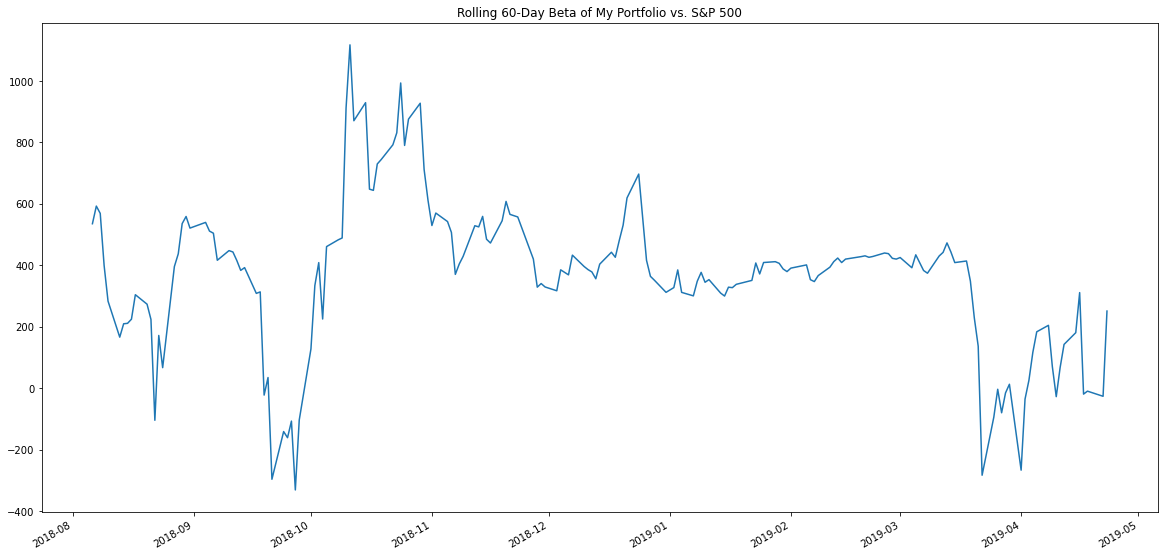

In [138]:
# Calculate and plot Beta
rolling_covariance_all = all_portfolio_returns['My Portfolio'].rolling(window=60).cov(combined_df['sp500'])
rolling_variance_all = combined_df['sp500'].rolling(window=60).var()
rolling_beta_all = rolling_covariance_all / rolling_variance_all
rolling_beta_all.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio vs. S&P 500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [139]:
# Calculate Annualzied Sharpe Ratios
all_sharpe_ratios = (all_portfolio_returns.mean() * 252) / (all_portfolio_returns.std() * np.sqrt(252))
all_sharpe_ratios

GOOG Close      266.090554
AAPL Close      141.987456
COST Close      244.268994
My Portfolio    271.303239
dtype: float64

<AxesSubplot:title={'center':'sharpe ratios'}>

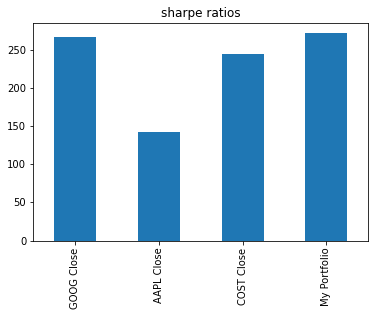

In [140]:
# Visualize the sharpe ratios as a bar plot
all_sharpe_ratios.plot(kind = 'bar', title = "sharpe ratios")

### How does your portfolio do?

Write your answer here!

In [141]:
#My portfolio outperforms a portfolio of GOOG, AAPL, and COST